In [32]:
import pandas as pd
import numpy as np
import joblib

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_path='datos/trainEAT.csv'
test_path='datos/testEAT.csv'

# Obtener dataset

In [3]:
df_gen = pd.read_csv('datos/TCA_general.csv')
df_T1 = pd.read_csv('datos/TCA_T1.csv')
df_T2 = pd.read_csv('datos/TCA_T2.csv')

In [ ]:
y = df_T2.filter(like='EAT')
for column in y.columns:
  y[column] = pd.to_numeric(y[column], errors='coerce')
y = y.sum(axis=1)
y = np.where(y > 20, 1, 0)
y

In [5]:
df = df_T1

In [6]:
df = df.drop(['ID', 'FECHA', 'EDAD', 'DIAGNOSTICO', 'OTROSDIAG', 'FECHAALTA', 'NINGUNOTRODIAG', 'ANSIEDAD', 'DEPRESIÓN', 'TPERSO', 'TBIPOLAR', 'TPSICOTICO', 'OtrosdiagnósticosademásdelTCA_B', 'MEDICACION1', 'MEDICACION2', 'MEDICACION3'], axis=1)
import re

regex = re.compile(r'SEIQOLCUE')
df = df.drop(list(filter(regex.search, df.columns)), axis=1)

regex = re.compile(r'SEIRANK')
df = df.drop(list(filter(regex.search, df.columns)), axis=1)

regex = re.compile(r'RESI2coment')
df = df.drop(list(filter(regex.search, df.columns)), axis=1)

In [7]:
df['labels'] = y

In [8]:
for column in df.columns:
    df[column] = df[column].replace(' ', '', regex=True).replace('', np.nan).astype(float)

In [9]:
for column in df_gen.columns:
    df_gen[column] = df_gen[column].replace(' ', '', regex=True).replace('', np.nan)

In [10]:
df_gen[['AÑOSPADECIENDO','AÑOSTTO','EDADCOMIENZO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AÑOSPADECIENDO  228 non-null    object
 1   AÑOSTTO         224 non-null    object
 2   EDADCOMIENZO    225 non-null    object
dtypes: object(3)
memory usage: 13.8+ KB


In [12]:
df.fillna(2, inplace=True)

In [13]:
df['EDAD'] = df_T1['EDAD'].replace(' ', '', regex=True).replace('', np.nan).astype(float)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Columns: 149 entries, WHOQOL1 to EDAD
dtypes: float64(149)
memory usage: 675.3 KB


C:\Users\a.pikatza\AppData\Local\Temp\ipykernel_24980\3733091737.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['EDAD'] = df_T1['EDAD'].replace(' ', '', regex=True).replace('', np.nan).astype(float)


In [14]:
conteo_clases = df['labels'].value_counts()

print(conteo_clases)

labels
0.0    571
1.0      9
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['labels'], axis=1)

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Escala los valores de las características en el rango [0, 1]
X = scaler.fit_transform(X)

# Convertir la matriz X a un DataFrame
df_scaled = pd.DataFrame(X, columns=df.columns[:-1])

# Añadir la columna 'labels' al DataFrame escalado
df_scaled['labels'] = df['labels']

In [16]:
df_scaled.to_csv('datos/EAT.csv')

In [17]:
conteo_clases = df_scaled['labels'].value_counts()

print(conteo_clases)

labels
0.0    571
1.0      9
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split

train_test_ratio = 0.8
df_train, df_test = train_test_split(df_scaled, train_size = train_test_ratio, stratify=df_scaled['labels'], random_state = 1)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464 entries, 412 to 478
Columns: 148 entries, WHOQOL1 to labels
dtypes: float64(148)
memory usage: 540.1 KB


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 367 to 523
Columns: 148 entries, WHOQOL1 to labels
dtypes: float64(148)
memory usage: 135.0 KB


In [22]:
df_train.to_csv(train_path)
df_test.to_csv(test_path)

# Análisis del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Columns: 148 entries, WHOQOL1 to labels
dtypes: float64(147), int64(1)
memory usage: 674.2 KB


In [ ]:
df.dtypes

WHOQOL1         float64
WHOQOL2         float64
WHOQOL3         float64
WHOQOL4         float64
WHOQOL5         float64
                 ...   
RESI_ULTIM22    float64
RESI_ULTIM23    float64
RESI_ULTIM24    float64
RESI_ULTIM25    float64
labels            int64
Length: 148, dtype: object

In [ ]:
df.describe()

,WHOQOL1,WHOQOL2,WHOQOL3,WHOQOL4,WHOQOL5,WHOQOL6,WHOQOL7,WHOQOL8,WHOQOL9,WHOQOL10,...,RESI_ULTIM18,RESI_ULTIM19,RESI_ULTIM20,RESI_ULTIM21,RESI_ULTIM22,RESI_ULTIM23,RESI_ULTIM24,RESI_ULTIM25,labels,EDAD
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,...,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,3.803448,3.498276,4.513793,4.389655,3.605172,3.794828,3.682759,3.793103,4.106897,3.636207,...,5.520690,4.686207,4.863793,4.865517,4.037931,4.544828,4.637931,4.317241,0.144828,28.562069
std,0.906314,1.168822,0.844457,0.942141,1.101565,1.233236,1.103948,0.968567,0.844951,0.956967,...,1.803255,1.891208,1.745579,2.076062,1.842300,1.802816,1.880711,2.070280,0.352231,8.418744
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,16.000000
25%,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,...,5.000000,3.000000,4.000000,2.750000,2.000000,3.000000,3.000000,2.000000,0.000000,22.000000
50%,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,6.000000,5.000000,5.000000,6.000000,4.000000,5.000000,5.000000,5.000000,0.000000,26.000000
75%,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,...,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,0.000000,34.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000,71.000000


In [ ]:
df.isna().sum()

WHOQOL1         0
WHOQOL2         0
WHOQOL3         0
WHOQOL4         0
WHOQOL5         0
               ..
RESI_ULTIM23    0
RESI_ULTIM24    0
RESI_ULTIM25    0
labels          0
EDAD            0
Length: 149, dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Columns: 149 entries, WHOQOL1 to EDAD
dtypes: float64(149)
memory usage: 675.3 KB


In [ ]:
df.isna().sum()

WHOQOL1         0
WHOQOL2         0
WHOQOL3         0
WHOQOL4         0
WHOQOL5         0
               ..
RESI_ULTIM23    0
RESI_ULTIM24    0
RESI_ULTIM25    0
labels          0
EDAD            0
Length: 149, dtype: int64

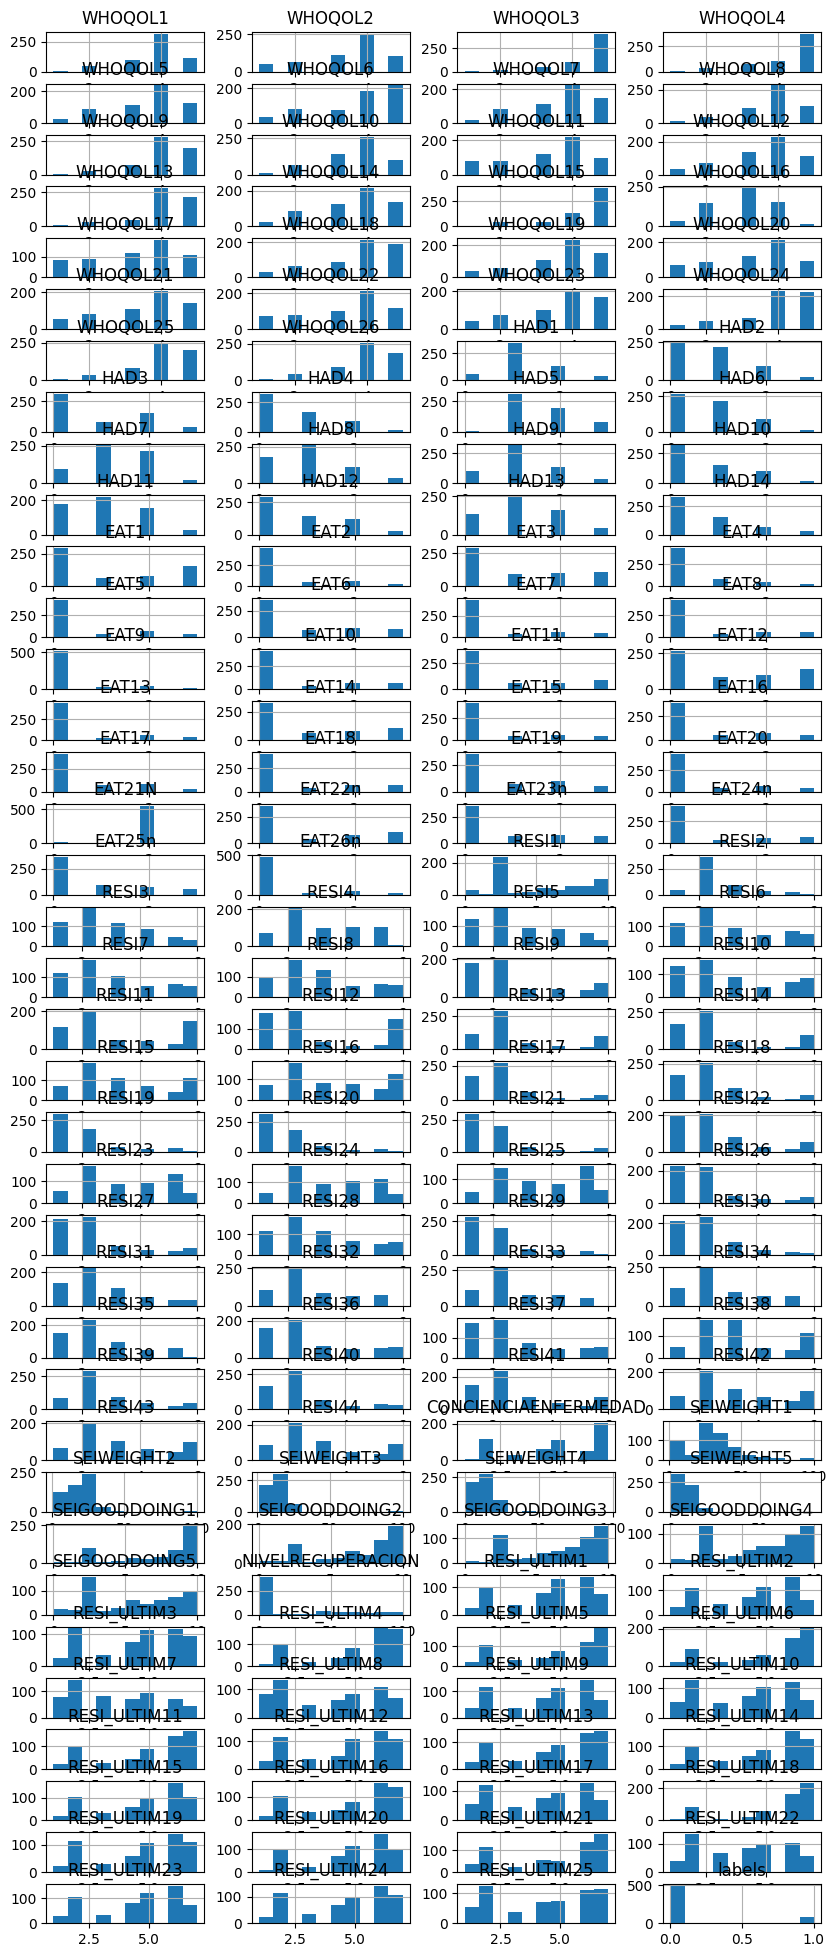

In [ ]:
df.hist(layout=(120, 4), figsize=(10,80));

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Find columns and indices where correlation coefficient is 1 or -1
corr_coeff_1_or_minus_1 = corr_matrix
correlation_pairs = []

# Iterate over the rows of the correlation matrix
for row in corr_coeff_1_or_minus_1.iterrows():
    col = row[0]
    corr_coeff = row[1].dropna()
    for index, value in corr_coeff.items():
        correlation_pairs.append((col, index, value))

# Display the correlated column pairs with correlation coefficient of 1 or -1
for pair in correlation_pairs:
    col1, col2, corr_coeff = pair
    if (corr_coeff > 0.9 or corr_coeff < -0.9) and col1 != col2:
      print("Column '{}' has correlation coefficient {} with column '{}'".format(col1, corr_coeff, col2))


Column 'RESI32' has correlation coefficient 0.9368357285176976 with column 'RESI33'
Column 'RESI33' has correlation coefficient 0.9368357285176976 with column 'RESI32'


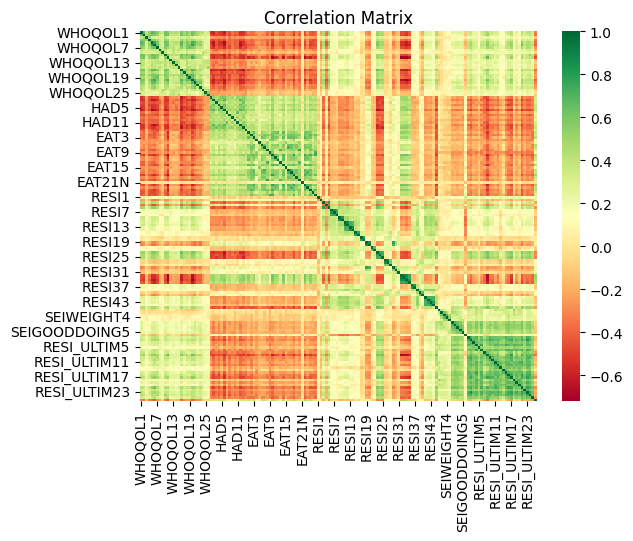

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()

# Create a heatmap with Seaborn
sns.heatmap(correlation, cmap="RdYlGn")

# Show the plot
plt.title("Correlation Matrix")
plt.show()

# Modelos

In [23]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

### Regresión logística

In [24]:
def logistic_regresion(X_train, y_train, X_test, y_test):
  # Definir el rango de valores de los hiperparámetros a probar
  param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

  # Definir el modelo
  lr = LogisticRegression()

  # Realizar la optimización de hiperparámetros utilizando GridSearchCV y validación cruzada
  grid = GridSearchCV(lr, param_grid, cv=5)
  grid.fit(X_train, y_train)

  # Imprimir los mejores valores de los hiperparámetros
  print("Mejores hiperparámetros: ", grid.best_params_)

  # Evaluar el modelo con los mejores hiperparámetros
  lr_best = LogisticRegression(C=grid.best_params_['C'])
  lr_best.fit(X_train, y_train)
  lr_pred = lr_best.predict(X_test)
  print("Precisión de regresión logística con los mejores hiperparámetros:", accuracy_score(y_test, lr_pred))

  return lr_pred

### Árbol de decisión

In [25]:
def decision_tree(X_train, y_train, X_test, y_test):
  # Definir el rango de valores de los hiperparámetros a probar
  param_grid = {'max_depth': [2, 4, 6, 8, 10],
                'min_samples_split': [2, 4, 6, 8, 10]}

  # Definir el modelo
  dt = DecisionTreeClassifier()

  # Realizar la optimización de hiperparámetros utilizando GridSearchCV y validación cruzada
  grid = GridSearchCV(dt, param_grid, cv=5)
  grid.fit(X_train, y_train)

  # Imprimir los mejores valores de los hiperparámetros
  print("Mejores hiperparámetros: ", grid.best_params_)

  # Evaluar el modelo con los mejores hiperparámetros
  dt_best = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'],
                                    min_samples_split=grid.best_params_['min_samples_split'])
  dt_best.fit(X_train, y_train)
  dt_pred = dt_best.predict(X_test)
  print("Precisión del árbol de decisión con los mejores hiperparámetros:", accuracy_score(y_test, dt_pred))

  return dt_pred

### SVM

In [26]:
def svm(X_train, y_train, X_test, y_test):
  # Definir el rango de valores de los hiperparámetros a probar
  param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}

  # Definir el modelo
  svm = SVC()

  # Realizar la optimización de hiperparámetros utilizando GridSearchCV y validación cruzada
  grid = GridSearchCV(svm, param_grid, cv=5)
  grid.fit(X_train, y_train)

  # Imprimir los mejores valores de los hiperparámetros
  print("Mejores hiperparámetros: ", grid.best_params_)

  # Evaluar el modelo con los mejores hiperparámetros
  svm_best = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
  svm_best.fit(X_train, y_train)
  svm_pred = svm_best.predict(X_test)
  print("Precisión de SVM con los mejores hiperparámetros:", accuracy_score(y_test, svm_pred))

  return svm_pred

### Redes neuronales

In [27]:
def neural_network(X_train, y_train, X_test, y_test):
  # Definir el rango de valores de los hiperparámetros a probar
  param_grid = {'hidden_layer_sizes': [(10,), (50,), (100,)],
                'activation': ['relu', 'logistic'],
                'learning_rate': ['constant', 'adaptive']}

  # Definir el modelo
  nn = MLPClassifier()

  # Realizar la optimización de hiperparámetros utilizando GridSearchCV y validación cruzada
  grid = GridSearchCV(nn, param_grid, cv=5)
  grid.fit(X_train, y_train)

  # Imprimir los mejores valores de los hiperparámetros
  print("Mejores hiperparámetros: ", grid.best_params_)

  # Evaluar el modelo con los mejores hiperparámetros
  nn_best = MLPClassifier(hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'],
                          activation=grid.best_params_['activation'],
                          learning_rate=grid.best_params_['learning_rate'])
  nn_best.fit(X_train, y_train)
  nn_pred = nn_best.predict(X_test)
  print("Precisión de redes neuronales con los mejores hiperparámetros:", accuracy_score(y_test, nn_pred))

  return nn_pred

### KNN

In [28]:
def k_neighbors(X_train, y_train, X_test, y_test):
  # Definimos los posibles valores de los hiperparámetros que queremos probar
  param_grid = {'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]}

  # Creamos el objeto GridSearchCV y lo ajustamos con los datos de entrenamiento
  knn = KNeighborsClassifier()
  grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  # Imprimimos los mejores valores de los hiperparámetros encontrados y la precisión correspondiente
  print("Mejores hiperparámetros: ", grid_search.best_params_)

  # Evaluar el modelo con los mejores hiperparámetros
  knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                          weights=grid_search.best_params_['weights'],
                          p=grid_search.best_params_['p'])
  knn_best.fit(X_train, y_train)
  knn_pred = knn_best.predict(X_test)
  print("Precisión de KNN:", accuracy_score(y_test, knn_pred))

  return knn_pred

### Random forest

In [29]:
def random_forest(X_train, y_train, X_test, y_test):
  # Definimos los posibles valores de los hiperparámetros que queremos probar
  param_grid = {'n_estimators': [100, 200, 500],
                'max_depth': [5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

  # Creamos el objeto GridSearchCV y lo ajustamos con los datos de entrenamiento
  rf = RandomForestClassifier()
  grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  # Imprimimos los mejores valores de los hiperparámetros encontrados
  print("Mejores hiperparámetros: ", grid_search.best_params_)

  # Evaluar el modelo con los mejores hiperparámetros
  rf_best = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                          max_depth=grid_search.best_params_['max_depth'],
                          min_samples_split=grid_search.best_params_['min_samples_split'],
                          min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
  rf_best.fit(X_train, y_train)
  rf_pred = rf_best.predict(X_test)
  print("Precisión de Random Forest:", accuracy_score(y_test, rf_pred))

  return rf_pred

### Gradient Boosting

In [30]:
def gradient_boosting(X_train, y_train, X_test, y_test):
  # Definimos los posibles valores de los hiperparámetros que queremos probar
  param_grid = {'n_estimators': [100, 200, 500],
                'learning_rate': [0.01, 0.1, 1],
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

  # Creamos el objeto GridSearchCV y lo ajustamos con los datos de entrenamiento
  gb = GradientBoostingClassifier()
  grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  # Imprimimos los mejores valores de los hiperparámetros encontrados
  print("Mejores hiperparámetros: ", grid_search.best_params_)

  # Evaluar el modelo con los mejores hiperparámetros
  gb_best = GradientBoostingClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                          learning_rate=grid_search.best_params_['learning_rate'],
                          max_depth=grid_search.best_params_['max_depth'],
                          min_samples_split=grid_search.best_params_['min_samples_split'],
                          min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
  gb_best.fit(X_train, y_train)
  gb_pred = gb_best.predict(X_test)
  print("Precisión de Random Forest:", accuracy_score(y_test, gb_pred))
  return gb_pred

## Naive Bayes

In [31]:
def naive_bayes(X_train, y_train, X_test, y_test):
  # Crear una instancia del modelo Naive Bayes
  nb = GaussianNB()

  # Entrenar el modelo
  nb.fit(X_train, y_train)

  # Realizar predicciones en el conjunto de prueba
  nb_pred = nb.predict(X_test)

  # Evaluar la precisión del modelo
  print("Precisión de Naive Bayes:", accuracy_score(y_test, nb_pred))

  return nb_pred, nb

# Resultados

In [ ]:
columns = ['Regresión Logística', '', '', '', 'Árbol de decisión', '', '', '', 'SVM', '', '', '', 'Red neuronal', '', '', '',
           'KNN', '', '', '', 'Random Forest', '', '', '', 'Gradient Boosting', '', '', '', 'Naive Bayes', '', '', '']
results = pd.DataFrame(columns=columns)
results.loc['Metrics'] = ['ROC AUC', 'Especificidad', 'Sensibilidad', 'F1-score',
                          'ROC AUC', 'Especificidad', 'Sensibilidad', 'F1-score',
                          'ROC AUC', 'Especificidad', 'Sensibilidad', 'F1-score',
                          'ROC AUC', 'Especificidad', 'Sensibilidad', 'F1-score',
                          'ROC AUC', 'Especificidad', 'Sensibilidad', 'F1-score',
                          'ROC AUC', 'Especificidad', 'Sensibilidad', 'F1-score',
                          'ROC AUC', 'Especificidad', 'Sensibilidad', 'F1-score',
                          'ROC AUC', 'Especificidad', 'Sensibilidad', 'F1-score']
results

,Regresión Logística,,,,Árbol de decisión,,,,SVM,,...,,,Gradient Boosting,,,,Naive Bayes,,,
Metrics,ROC AUC,Especificidad,Sensibilidad,F1-score,ROC AUC,Especificidad,Sensibilidad,F1-score,ROC AUC,Especificidad,...,Sensibilidad,F1-score,ROC AUC,Especificidad,Sensibilidad,F1-score,ROC AUC,Especificidad,Sensibilidad,F1-score


In [ ]:
def calculateSpecificity(y_true, y_pred):
  # Calcular la matriz de confusión
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

  # Calcular especificidad
  return tn / (tn + fp)

In [23]:
import matplotlib.pyplot as plt

def calculateImportance(nb, X, y):
    feature_names = X.columns

    # Calculate feature importance
    importance = permutation_importance(nb, X, y, scoring='roc_auc')

    # Get the indices of features sorted by importance
    feature_indices = importance.importances_mean.argsort()[::1]

    # Plot the feature importances
    plt.figure(figsize=(8, 8))
    plt.barh(range(len(feature_indices)), importance.importances_mean[feature_indices], color='b', align='center')
    plt.yticks(range(len(feature_indices)), feature_names[feature_indices])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

## Clasificación con dataset completo

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['labels'], axis=1)
y_train = df_train['labels']
X_test = df_test.drop(['labels'], axis=1)
y_test = df_test['labels']

In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 1}
Precisión de regresión logística con los mejores hiperparámetros: 0.8620689655172413


In [ ]:
dt_pred = decision_tree(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 4, 'min_samples_split': 6}
Precisión del árbol de decisión con los mejores hiperparámetros: 0.8103448275862069


In [ ]:
svm_pred = svm(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 0.1, 'gamma': 0.1}
Precisión de SVM con los mejores hiperparámetros: 0.853448275862069


In [ ]:
nn_pred = neural_network(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
Precisión de redes neuronales con los mejores hiperparámetros: 0.8620689655172413


In [ ]:
knn_pred = k_neighbors(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Precisión de KNN: 0.8620689655172413


In [ ]:
rf_pred = random_forest(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Precisión de Random Forest: 0.8448275862068966


In [ ]:
gb_pred = gradient_boosting(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Precisión de Random Forest: 0.853448275862069


In [ ]:
nb_pred, nb_all = naive_bayes(X_train, y_train, X_test, y_test)

Precisión de Naive Bayes: 0.7758620689655172


In [ ]:
results.loc['Completo'] = [roc_auc_score(y_test, lr_pred), calculateSpecificity(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred),
                           roc_auc_score(y_test, dt_pred), calculateSpecificity(y_test, dt_pred), recall_score(y_test, dt_pred), f1_score(y_test, dt_pred),
                           roc_auc_score(y_test, svm_pred), calculateSpecificity(y_test, svm_pred), recall_score(y_test, svm_pred), f1_score(y_test, svm_pred),
                           roc_auc_score(y_test, nn_pred), calculateSpecificity(y_test, nn_pred), recall_score(y_test, nn_pred), f1_score(y_test, nn_pred),
                           roc_auc_score(y_test, knn_pred), calculateSpecificity(y_test, knn_pred), recall_score(y_test, knn_pred), f1_score(y_test, knn_pred),
                           roc_auc_score(y_test, rf_pred), calculateSpecificity(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred),
                           roc_auc_score(y_test, gb_pred), calculateSpecificity(y_test, gb_pred), recall_score(y_test, gb_pred), f1_score(y_test, gb_pred),
                           roc_auc_score(y_test, nb_pred), calculateSpecificity(y_test, nb_pred), recall_score(y_test, nb_pred), f1_score(y_test, nb_pred)]

### Explainability

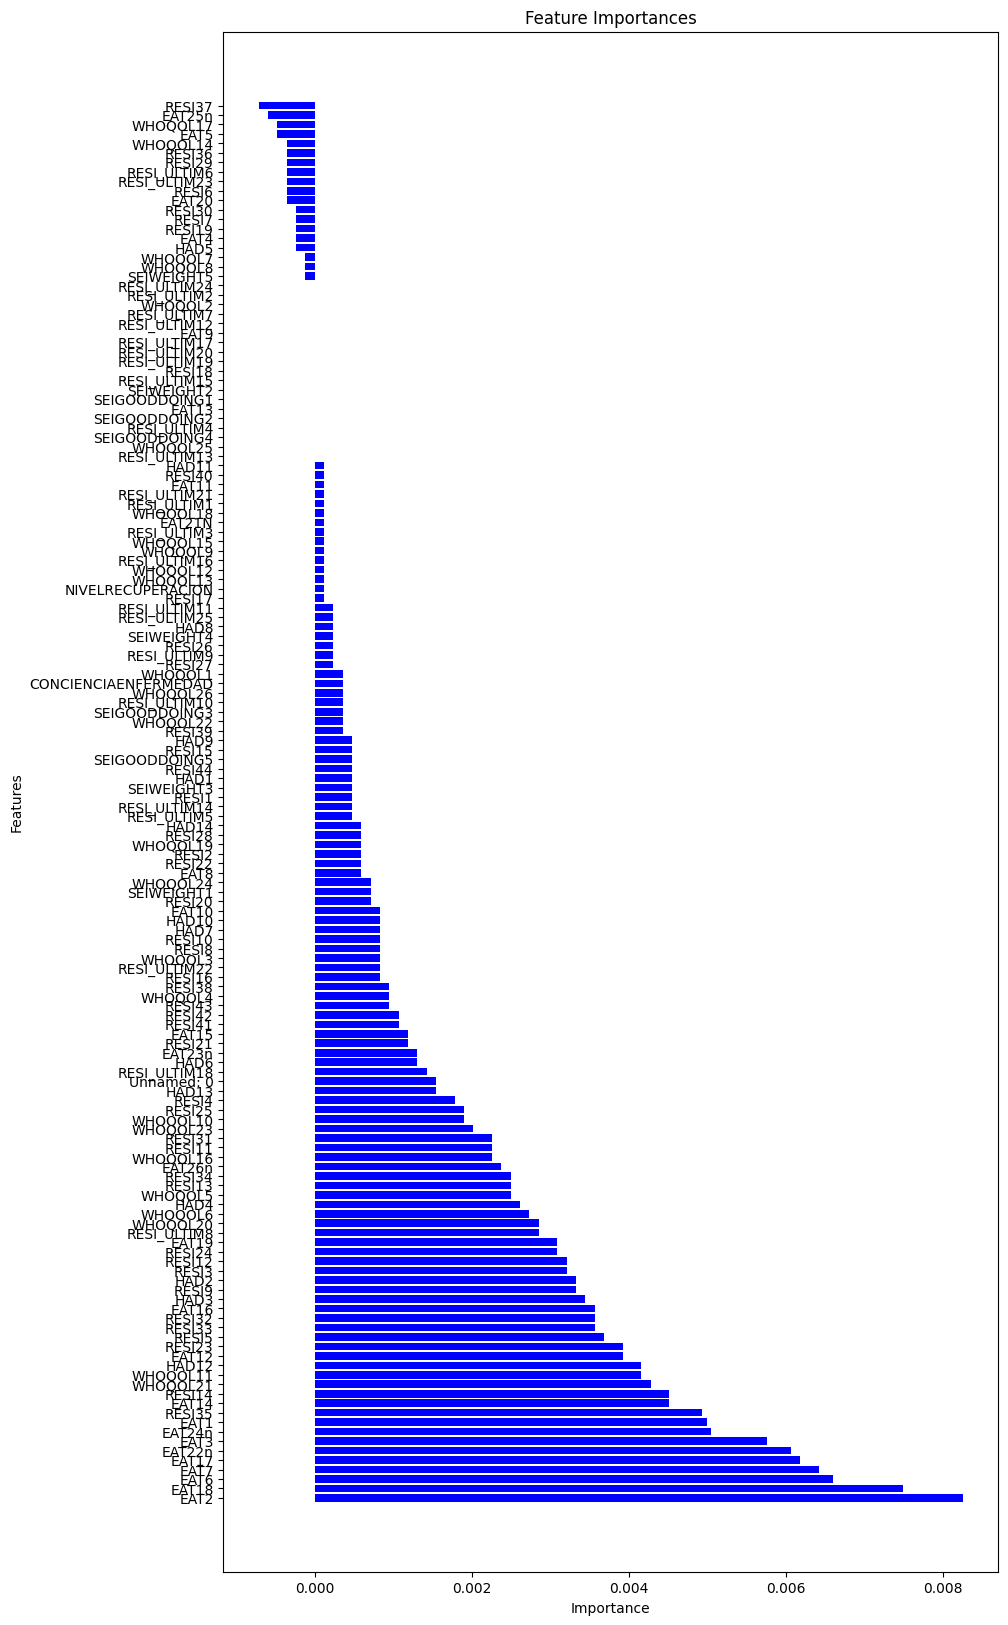

In [ ]:
calculateImportance(nb_all, X_test, y_test)

## Clasificación con dataset completo (extracción de carácteristicas)

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [ ]:
df_train_ec = pd.DataFrame()
df_test_ec = pd.DataFrame()

c = df_train.filter(regex='^WHOQOL').columns.tolist()
df_train_ec['WHOQOL'] = df_train[c].sum(axis=1)
c = df_train.filter(regex='^HAD').columns.tolist()
df_train_ec['HAD'] = df_train[c].sum(axis=1)
c = df_train.filter(regex='^EAT').columns.tolist()
df_train_ec['EAT'] = df_train[c].sum(axis=1)
c = df_train.filter(regex='^RESI[^_]').columns.tolist()
df_train_ec['RESI'] = df_train[c].sum(axis=1)
c = df_train.filter(regex='^SEIGOODDOING').columns.tolist()
df_train_ec['SEIGGOODDOING'] = df_train[c].sum(axis=1)
c = df_train.filter(regex='^RESI_').columns.tolist()
df_train_ec['RESI_ULTIM'] = df_train[c].sum(axis=1)
df_train_ec['labels'] = df_train['labels']

c = df_test.filter(regex='^WHOQOL').columns.tolist()
df_test_ec['WHOQOL'] = df_test[c].sum(axis=1)
c = df_test.filter(regex='^HAD').columns.tolist()
df_test_ec['HAD'] = df_test[c].sum(axis=1)
c = df_test.filter(regex='^EAT').columns.tolist()
df_test_ec['EAT'] = df_test[c].sum(axis=1)
c = df_test.filter(regex='^RESI[^_]').columns.tolist()
df_test_ec['RESI'] = df_test[c].sum(axis=1)
c = df_test.filter(regex='^SEIGOODDOING').columns.tolist()
df_test_ec['SEIGGOODDOING'] = df_test[c].sum(axis=1)
c = df_test.filter(regex='^RESI_').columns.tolist()
df_test_ec['RESI_ULTIM'] = df_test[c].sum(axis=1)
df_test_ec['labels'] = df_test['labels']

In [ ]:
X_train = df_train_ec.drop(['labels'], axis=1)
y_train = df_train_ec['labels']
X_test = df_test_ec.drop(['labels'], axis=1)
y_test = df_test_ec['labels']

In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 0.01}
Precisión de regresión logística con los mejores hiperparámetros: 0.8362068965517241


In [ ]:
dt_pred = decision_tree(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 8, 'min_samples_split': 4}
Precisión del árbol de decisión con los mejores hiperparámetros: 0.8189655172413793


In [ ]:
svm_pred = svm(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 10, 'gamma': 0.1}
Precisión de SVM con los mejores hiperparámetros: 0.8103448275862069


In [ ]:
nn_pred = neural_network(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
Precisión de redes neuronales con los mejores hiperparámetros: 0.8362068965517241


In [ ]:
knn_pred = k_neighbors(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Precisión de KNN: 0.8275862068965517


In [ ]:
rf_pred = random_forest(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Precisión de Random Forest: 0.8448275862068966


In [ ]:
gb_pred = gradient_boosting(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'learning_rate': 0.01, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Precisión de Random Forest: 0.8275862068965517


In [ ]:
nb_pred, nb_ec = naive_bayes(X_train, y_train, X_test, y_test)

Precisión de Naive Bayes: 0.7844827586206896


In [ ]:
results.loc['Completo (EC)'] = [roc_auc_score(y_test, lr_pred), calculateSpecificity(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred),
                           roc_auc_score(y_test, dt_pred), calculateSpecificity(y_test, dt_pred), recall_score(y_test, dt_pred), f1_score(y_test, dt_pred),
                           roc_auc_score(y_test, svm_pred), calculateSpecificity(y_test, svm_pred), recall_score(y_test, svm_pred), f1_score(y_test, svm_pred),
                           roc_auc_score(y_test, nn_pred), calculateSpecificity(y_test, nn_pred), recall_score(y_test, nn_pred), f1_score(y_test, nn_pred),
                           roc_auc_score(y_test, knn_pred), calculateSpecificity(y_test, knn_pred), recall_score(y_test, knn_pred), f1_score(y_test, knn_pred),
                           roc_auc_score(y_test, rf_pred), calculateSpecificity(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred),
                           roc_auc_score(y_test, gb_pred), calculateSpecificity(y_test, gb_pred), recall_score(y_test, gb_pred), f1_score(y_test, gb_pred),
                           roc_auc_score(y_test, nb_pred), calculateSpecificity(y_test, nb_pred), recall_score(y_test, nb_pred), f1_score(y_test, nb_pred)]

### Explainability

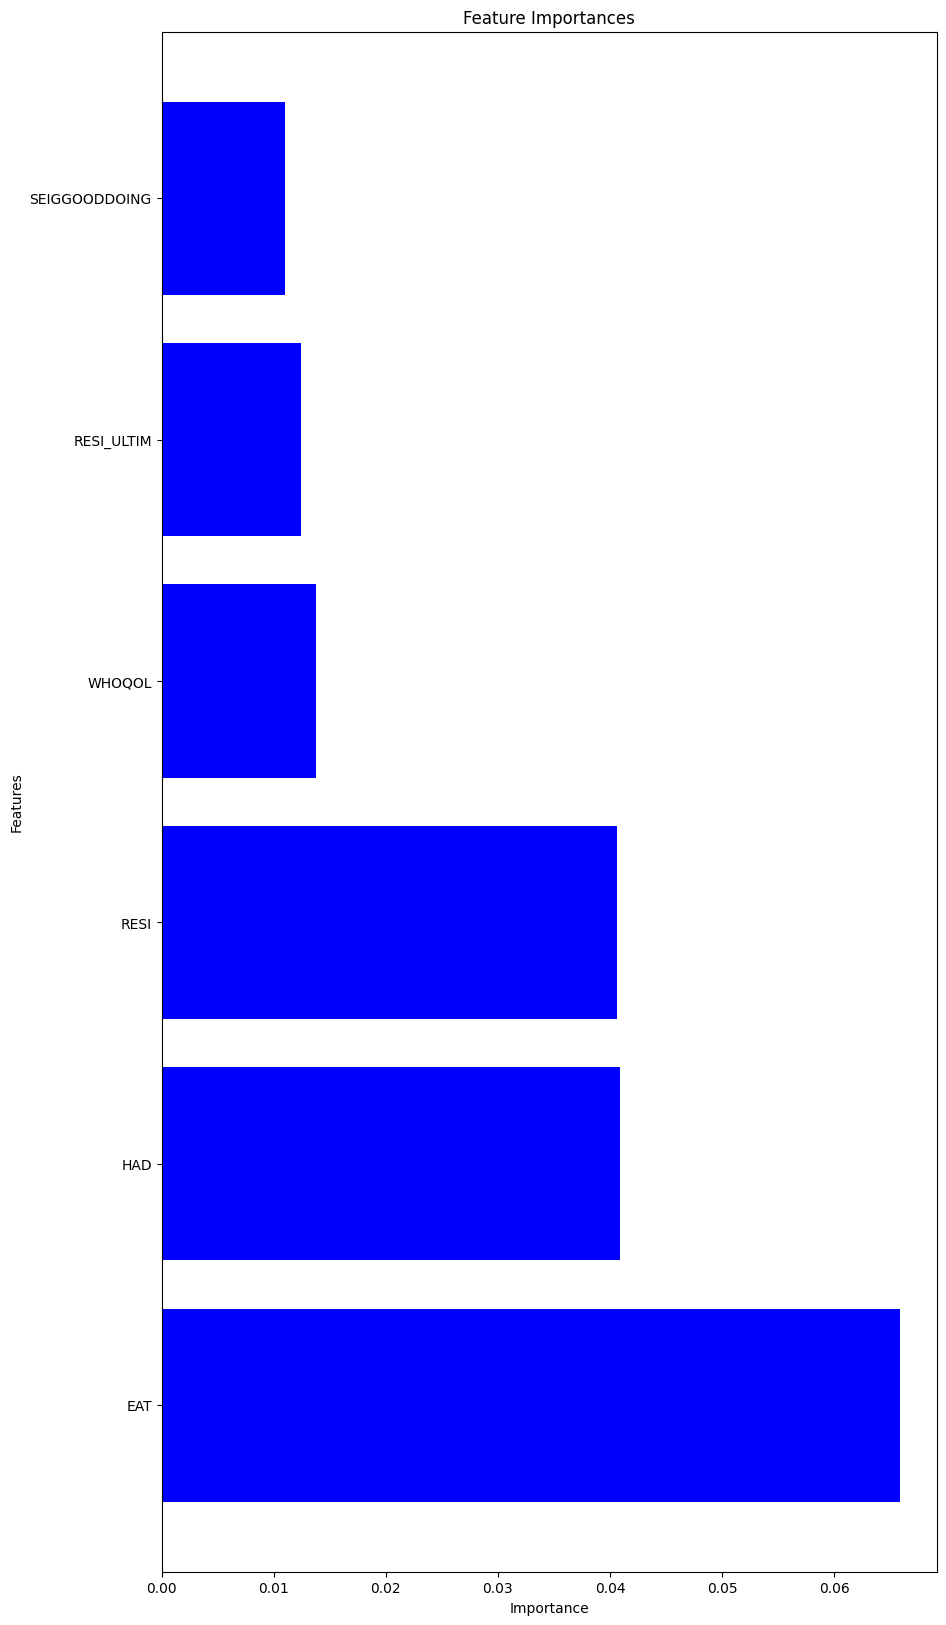

In [ ]:
calculateImportance(nb_ec, X_test, y_test)

In [ ]:
#calculateShapley(nb_ec, X_test, 0)

## Clasificación con WHOQOL

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['labels'], axis=1).filter(regex='^WHOQOL')
y_train = df_train['labels']
X_test = df_test.drop(['labels'], axis=1).filter(regex='^WHOQOL')
y_test = df_test['labels']

In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 1}
Precisión de regresión logística con los mejores hiperparámetros: 0.853448275862069


In [ ]:
dt_pred = decision_tree(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 4, 'min_samples_split': 2}
Precisión del árbol de decisión con los mejores hiperparámetros: 0.8017241379310345


In [ ]:
svm_pred = svm(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 10, 'gamma': 0.1}
Precisión de SVM con los mejores hiperparámetros: 0.853448275862069


In [ ]:
nn_pred = neural_network(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
Precisión de redes neuronales con los mejores hiperparámetros: 0.8448275862068966


In [ ]:
knn_pred = k_neighbors(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Precisión de KNN: 0.8620689655172413


In [ ]:
rf_pred = random_forest(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Precisión de Random Forest: 0.8448275862068966


In [ ]:
gb_pred = gradient_boosting(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Precisión de Random Forest: 0.8706896551724138


In [ ]:
nb_pred, nb_who = naive_bayes(X_train, y_train, X_test, y_test)

Precisión de Naive Bayes: 0.75


In [ ]:
results.loc['WHOQOL'] = [roc_auc_score(y_test, lr_pred), calculateSpecificity(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred),
                           roc_auc_score(y_test, dt_pred), calculateSpecificity(y_test, dt_pred), recall_score(y_test, dt_pred), f1_score(y_test, dt_pred),
                           roc_auc_score(y_test, svm_pred), calculateSpecificity(y_test, svm_pred), recall_score(y_test, svm_pred), f1_score(y_test, svm_pred),
                           roc_auc_score(y_test, nn_pred), calculateSpecificity(y_test, nn_pred), recall_score(y_test, nn_pred), f1_score(y_test, nn_pred),
                           roc_auc_score(y_test, knn_pred), calculateSpecificity(y_test, knn_pred), recall_score(y_test, knn_pred), f1_score(y_test, knn_pred),
                           roc_auc_score(y_test, rf_pred), calculateSpecificity(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred),
                           roc_auc_score(y_test, gb_pred), calculateSpecificity(y_test, gb_pred), recall_score(y_test, gb_pred), f1_score(y_test, gb_pred),
                           roc_auc_score(y_test, nb_pred), calculateSpecificity(y_test, nb_pred), recall_score(y_test, nb_pred), f1_score(y_test, nb_pred)]

### Explainability

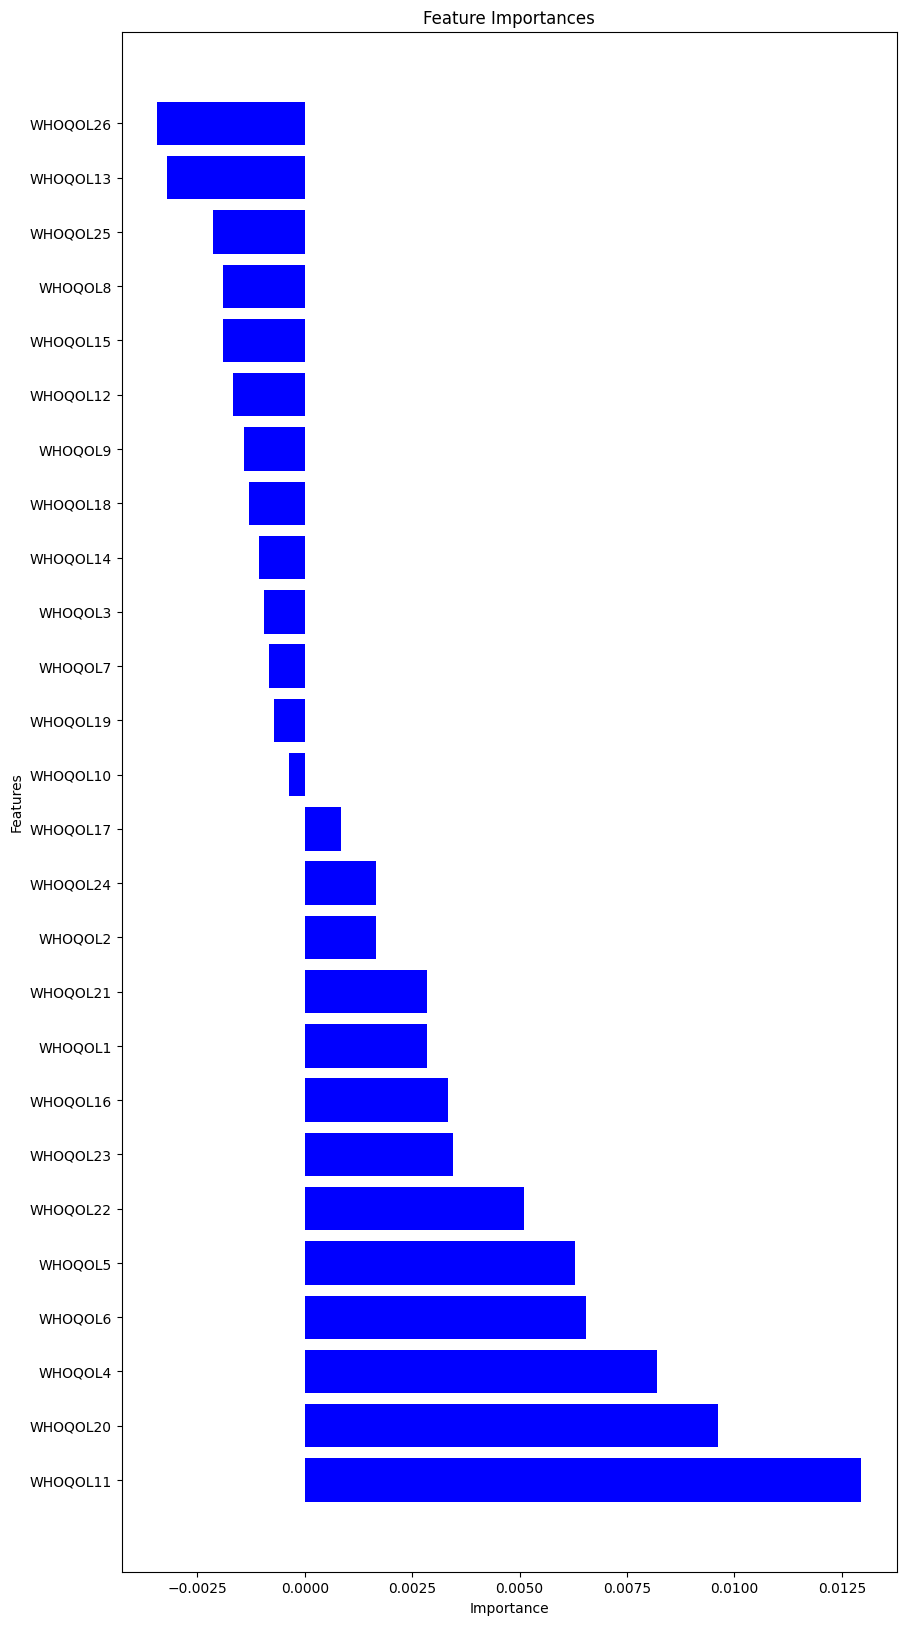

In [ ]:
calculateImportance(nb_who, X_test, y_test)

In [ ]:
#calculateShapley(nb_who, X_test, 0)

## Clasificación con HAD

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['labels'], axis=1).filter(regex='^HAD')
y_train = df_train['labels']
X_test = df_test.drop(['labels'], axis=1).filter(regex='^HAD')
y_test = df_test['labels']

In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 1}
Precisión de regresión logística con los mejores hiperparámetros: 0.9051724137931034


In [ ]:
dt_pred = decision_tree(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 4, 'min_samples_split': 2}
Precisión del árbol de decisión con los mejores hiperparámetros: 0.8620689655172413


In [ ]:
svm_pred = svm(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 10, 'gamma': 0.1}
Precisión de SVM con los mejores hiperparámetros: 0.9051724137931034


In [ ]:
nn_pred = neural_network(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
Precisión de redes neuronales con los mejores hiperparámetros: 0.896551724137931


In [ ]:
knn_pred = k_neighbors(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Precisión de KNN: 0.8879310344827587


In [ ]:
rf_pred = random_forest(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Precisión de Random Forest: 0.8793103448275862


In [ ]:
gb_pred = gradient_boosting(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Precisión de Random Forest: 0.8448275862068966


In [ ]:
nb_pred, nb_had = naive_bayes(X_train, y_train, X_test, y_test)

Precisión de Naive Bayes: 0.7758620689655172


In [ ]:
results.loc['HAD'] = [roc_auc_score(y_test, lr_pred), calculateSpecificity(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred),
                           roc_auc_score(y_test, dt_pred), calculateSpecificity(y_test, dt_pred), recall_score(y_test, dt_pred), f1_score(y_test, dt_pred),
                           roc_auc_score(y_test, svm_pred), calculateSpecificity(y_test, svm_pred), recall_score(y_test, svm_pred), f1_score(y_test, svm_pred),
                           roc_auc_score(y_test, nn_pred), calculateSpecificity(y_test, nn_pred), recall_score(y_test, nn_pred), f1_score(y_test, nn_pred),
                           roc_auc_score(y_test, knn_pred), calculateSpecificity(y_test, knn_pred), recall_score(y_test, knn_pred), f1_score(y_test, knn_pred),
                           roc_auc_score(y_test, rf_pred), calculateSpecificity(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred),
                           roc_auc_score(y_test, gb_pred), calculateSpecificity(y_test, gb_pred), recall_score(y_test, gb_pred), f1_score(y_test, gb_pred),
                           roc_auc_score(y_test, nb_pred), calculateSpecificity(y_test, nb_pred), recall_score(y_test, nb_pred), f1_score(y_test, nb_pred)]

### Explainability

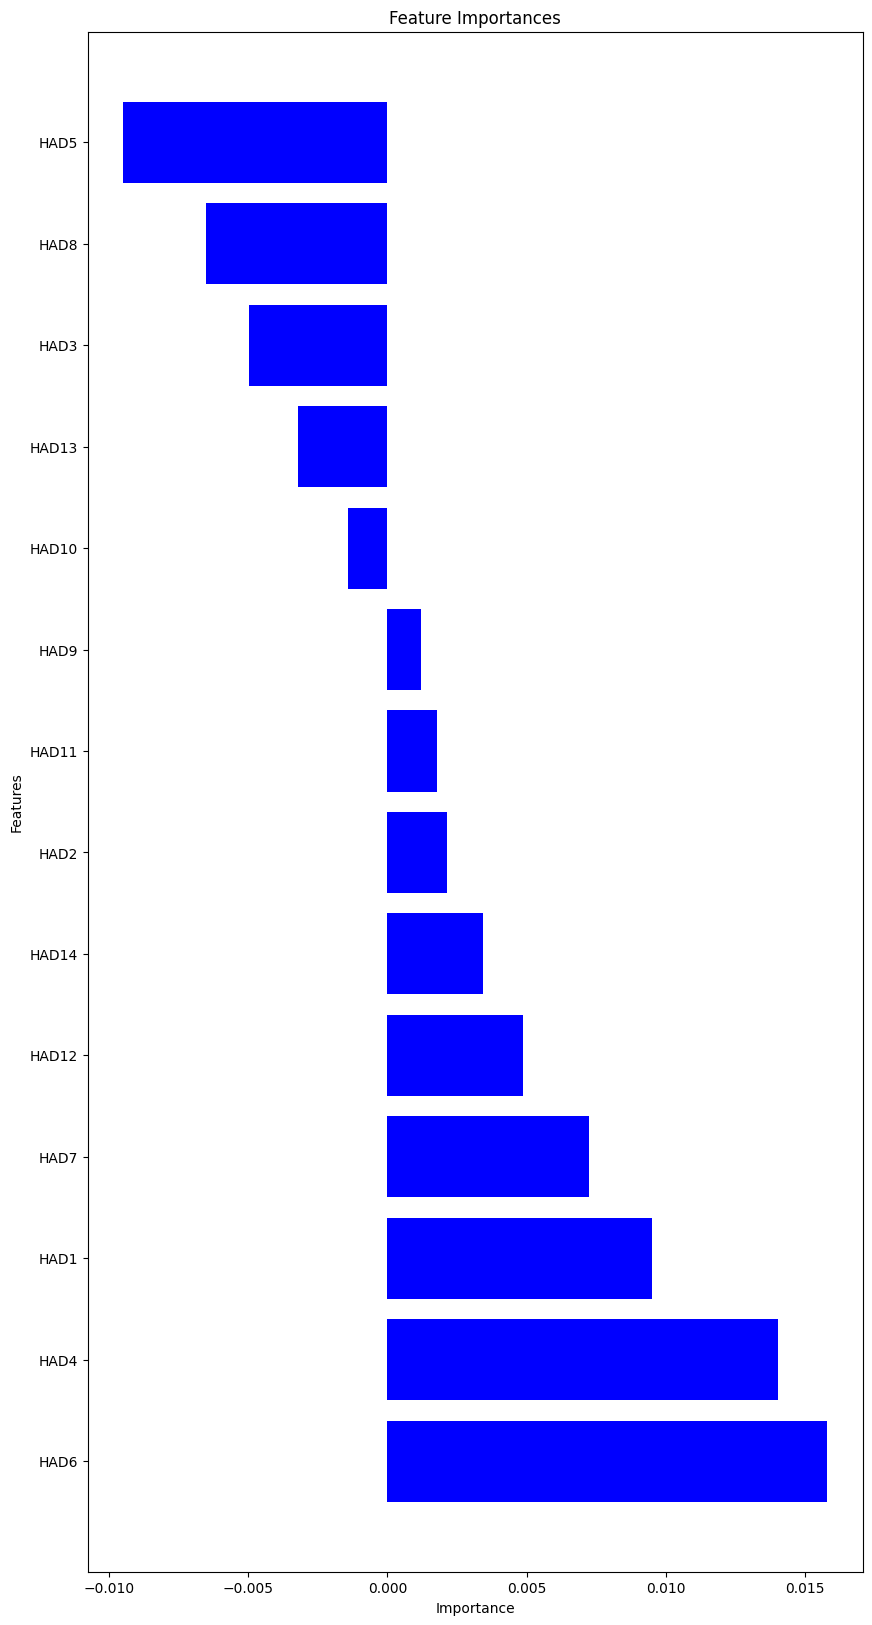

In [ ]:
calculateImportance(nb_had, X_test, y_test)

In [ ]:
#calculateShapley(nb_had, X_test, 0)

## Clasificación con EAT

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['labels'], axis=1).filter(regex='^EAT')
y_train = df_train['labels']
X_test = df_test.drop(['labels'], axis=1).filter(regex='^EAT')
y_test = df_test['labels']

In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 1}
Precisión de regresión logística con los mejores hiperparámetros: 0.853448275862069


In [ ]:
dt_pred = decision_tree(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 8, 'min_samples_split': 10}
Precisión del árbol de decisión con los mejores hiperparámetros: 0.8448275862068966


In [ ]:
svm_pred = svm(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 10, 'gamma': 0.1}
Precisión de SVM con los mejores hiperparámetros: 0.8448275862068966


In [ ]:
nn_pred = neural_network(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Precisión de redes neuronales con los mejores hiperparámetros: 0.8706896551724138


In [ ]:
knn_pred = k_neighbors(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Precisión de KNN: 0.853448275862069


In [ ]:
rf_pred = random_forest(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Precisión de Random Forest: 0.8362068965517241


In [ ]:
gb_pred = gradient_boosting(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Precisión de Random Forest: 0.8448275862068966


In [ ]:
nb_pred, nb_eat = naive_bayes(X_train, y_train, X_test, y_test)

Precisión de Naive Bayes: 0.75


In [ ]:
results.loc['EAT'] = [roc_auc_score(y_test, lr_pred), calculateSpecificity(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred),
                           roc_auc_score(y_test, dt_pred), calculateSpecificity(y_test, dt_pred), recall_score(y_test, dt_pred), f1_score(y_test, dt_pred),
                           roc_auc_score(y_test, svm_pred), calculateSpecificity(y_test, svm_pred), recall_score(y_test, svm_pred), f1_score(y_test, svm_pred),
                           roc_auc_score(y_test, nn_pred), calculateSpecificity(y_test, nn_pred), recall_score(y_test, nn_pred), f1_score(y_test, nn_pred),
                           roc_auc_score(y_test, knn_pred), calculateSpecificity(y_test, knn_pred), recall_score(y_test, knn_pred), f1_score(y_test, knn_pred),
                           roc_auc_score(y_test, rf_pred), calculateSpecificity(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred),
                           roc_auc_score(y_test, gb_pred), calculateSpecificity(y_test, gb_pred), recall_score(y_test, gb_pred), f1_score(y_test, gb_pred),
                           roc_auc_score(y_test, nb_pred), calculateSpecificity(y_test, nb_pred), recall_score(y_test, nb_pred), f1_score(y_test, nb_pred)]

### Explainability

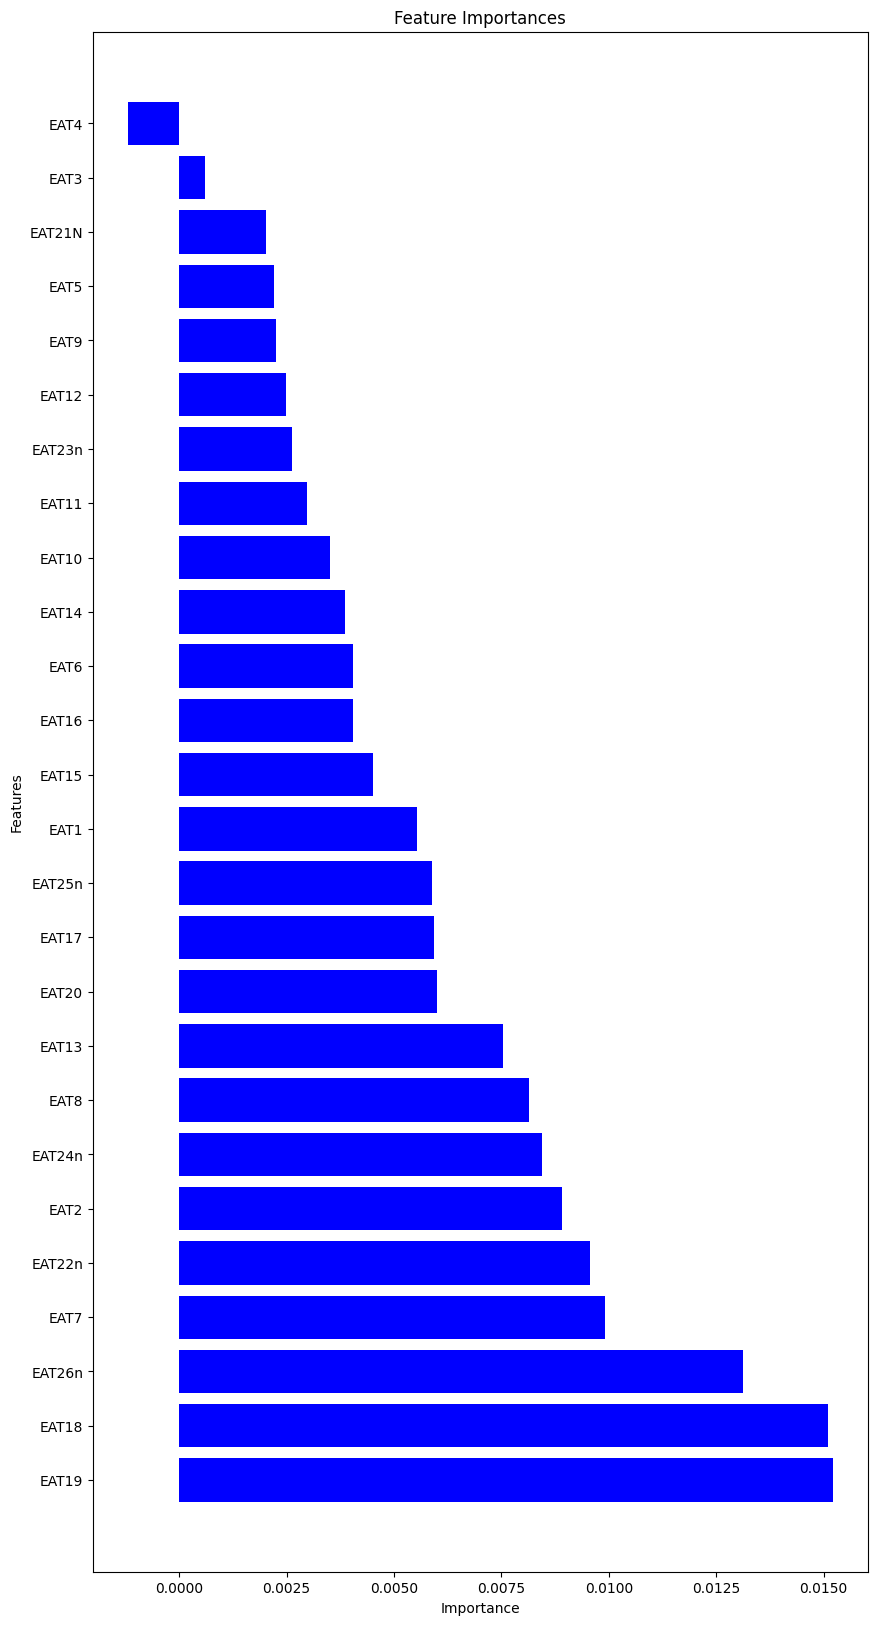

In [ ]:
calculateImportance(nb_eat, X_test, y_test)

In [ ]:
#calculateShapley(nb_eat, X_test, 0)

## Clasificación con RESI

In [33]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['labels'], axis=1).filter(regex='^RESI[^_]')
y_train = df_train['labels']
X_test = df_test.drop(['labels'], axis=1).filter(regex='^RESI[^_]')
y_test = df_test['labels']

In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 0.1}
Precisión de regresión logística con los mejores hiperparámetros: 0.8706896551724138


In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 0.1}
Precisión de regresión logística con los mejores hiperparámetros: 0.8706896551724138


In [ ]:
dt_pred = decision_tree(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 2, 'min_samples_split': 2}
Precisión del árbol de decisión con los mejores hiperparámetros: 0.8362068965517241


In [ ]:
svm_pred = svm(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 1, 'gamma': 0.1}
Precisión de SVM con los mejores hiperparámetros: 0.8448275862068966


In [ ]:
nn_pred = neural_network(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Precisión de redes neuronales con los mejores hiperparámetros: 0.853448275862069


In [ ]:
knn_pred = k_neighbors(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Precisión de KNN: 0.8448275862068966


In [ ]:
rf_pred = random_forest(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Precisión de Random Forest: 0.8620689655172413


In [ ]:
gb_pred = gradient_boosting(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Precisión de Random Forest: 0.896551724137931


In [ ]:
nb_pred, nb_resi = naive_bayes(X_train, y_train, X_test, y_test)
joblib.dump(nb_resi, "nb_resi_model.pkl")

Precisión de Naive Bayes: 0.9396551724137931


['nb_resi_model.pkl']

In [ ]:
results.loc['RESI'] = [roc_auc_score(y_test, lr_pred), calculateSpecificity(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred),
                           roc_auc_score(y_test, dt_pred), calculateSpecificity(y_test, dt_pred), recall_score(y_test, dt_pred), f1_score(y_test, dt_pred),
                           roc_auc_score(y_test, svm_pred), calculateSpecificity(y_test, svm_pred), recall_score(y_test, svm_pred), f1_score(y_test, svm_pred),
                           roc_auc_score(y_test, nn_pred), calculateSpecificity(y_test, nn_pred), recall_score(y_test, nn_pred), f1_score(y_test, nn_pred),
                           roc_auc_score(y_test, knn_pred), calculateSpecificity(y_test, knn_pred), recall_score(y_test, knn_pred), f1_score(y_test, knn_pred),
                           roc_auc_score(y_test, rf_pred), calculateSpecificity(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred),
                           roc_auc_score(y_test, gb_pred), calculateSpecificity(y_test, gb_pred), recall_score(y_test, gb_pred), f1_score(y_test, gb_pred),
                           roc_auc_score(y_test, nb_pred), calculateSpecificity(y_test, nb_pred), recall_score(y_test, nb_pred), f1_score(y_test, nb_pred)]

### Explainability

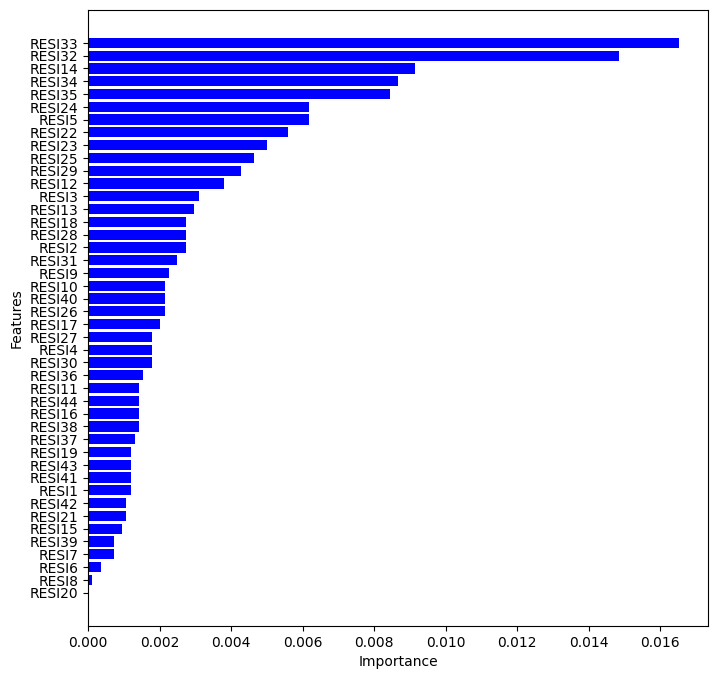

In [27]:
calculateImportance(nb_resi, X_test, y_test)

In [ ]:
#calculateShapley(nb_resi, X_test, 0)

## Clasificación con RED-5

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train[['RESI16', 'RESI27', 'RESI28', 'RESI30', 'RESI31']]
y_train = df_train['labels']
X_test = df_test[['RESI16', 'RESI27', 'RESI28', 'RESI30', 'RESI31']]
y_test = df_test['labels']

In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 0.01}
Precisión de regresión logística con los mejores hiperparámetros: 0.853448275862069


In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 0.01}
Precisión de regresión logística con los mejores hiperparámetros: 0.853448275862069


In [ ]:
dt_pred = decision_tree(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 2, 'min_samples_split': 2}
Precisión del árbol de decisión con los mejores hiperparámetros: 0.853448275862069


In [ ]:
svm_pred = svm(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 100, 'gamma': 0.1}
Precisión de SVM con los mejores hiperparámetros: 0.853448275862069


In [ ]:
nn_pred = neural_network(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
Precisión de redes neuronales con los mejores hiperparámetros: 0.8362068965517241


In [ ]:
knn_pred = k_neighbors(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Precisión de KNN: 0.8275862068965517


In [ ]:
rf_pred = random_forest(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Precisión de Random Forest: 0.8879310344827587


In [ ]:
gb_pred = gradient_boosting(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Precisión de Random Forest: 0.8793103448275862


In [ ]:
nb_pred, nb_resi = naive_bayes(X_train, y_train, X_test, y_test)

Precisión de Naive Bayes: 0.8706896551724138


In [ ]:
results.loc['RED5'] = [roc_auc_score(y_test, lr_pred), calculateSpecificity(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred),
                           roc_auc_score(y_test, dt_pred), calculateSpecificity(y_test, dt_pred), recall_score(y_test, dt_pred), f1_score(y_test, dt_pred),
                           roc_auc_score(y_test, svm_pred), calculateSpecificity(y_test, svm_pred), recall_score(y_test, svm_pred), f1_score(y_test, svm_pred),
                           roc_auc_score(y_test, nn_pred), calculateSpecificity(y_test, nn_pred), recall_score(y_test, nn_pred), f1_score(y_test, nn_pred),
                           roc_auc_score(y_test, knn_pred), calculateSpecificity(y_test, knn_pred), recall_score(y_test, knn_pred), f1_score(y_test, knn_pred),
                           roc_auc_score(y_test, rf_pred), calculateSpecificity(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred),
                           roc_auc_score(y_test, gb_pred), calculateSpecificity(y_test, gb_pred), recall_score(y_test, gb_pred), f1_score(y_test, gb_pred),
                           roc_auc_score(y_test, nb_pred), calculateSpecificity(y_test, nb_pred), recall_score(y_test, nb_pred), f1_score(y_test, nb_pred)]

### Explainability

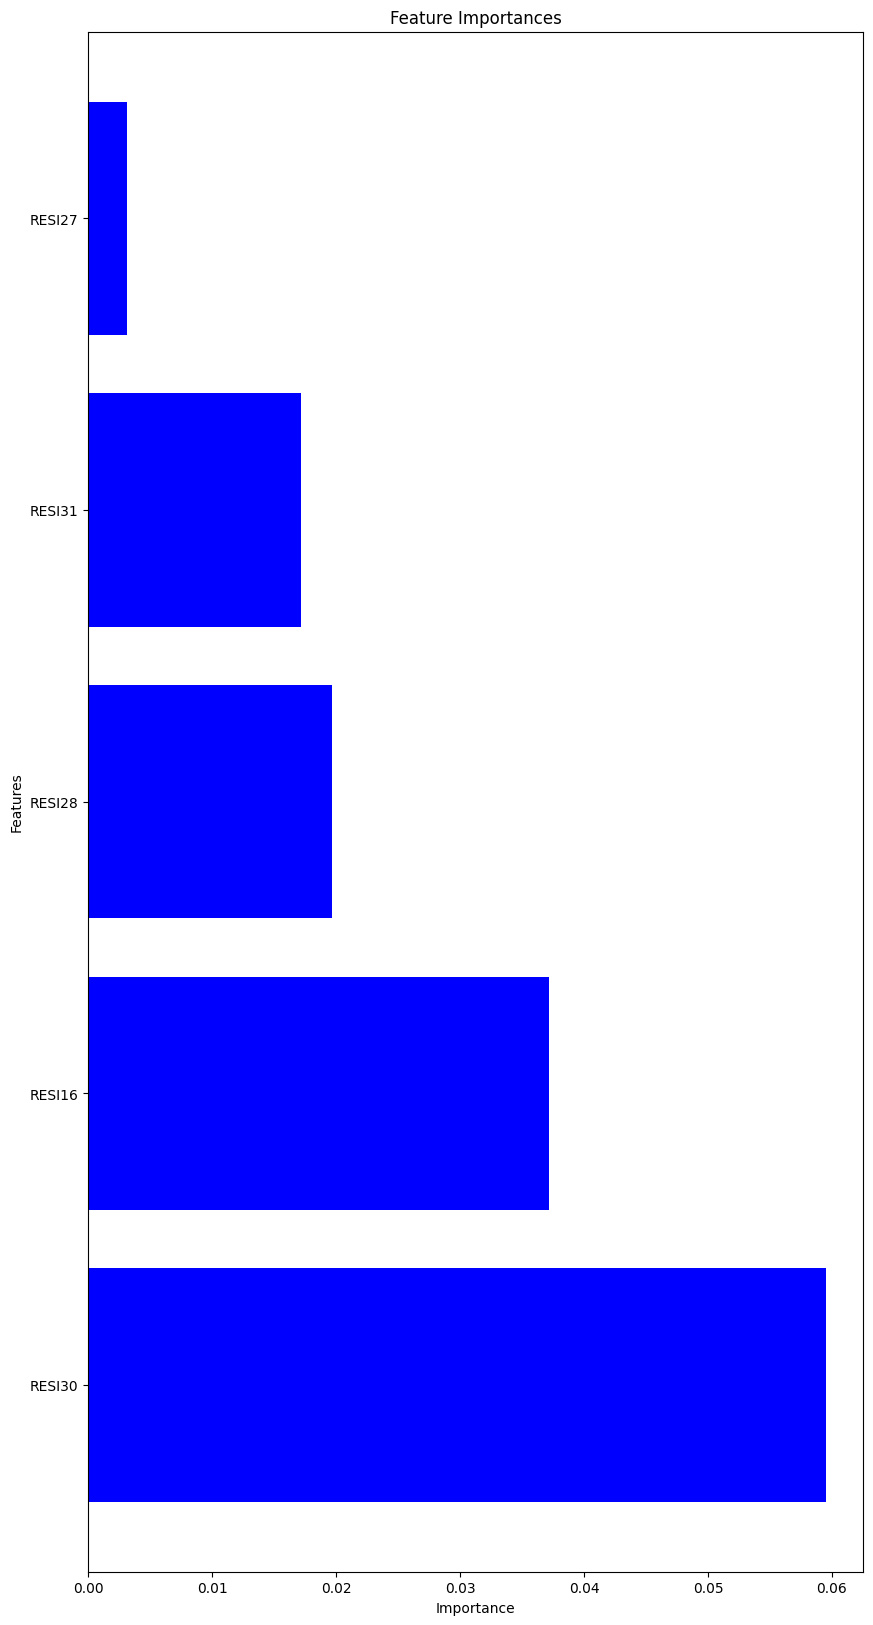

In [ ]:
calculateImportance(nb_resi, X_test, y_test)

In [ ]:
#calculateShapley(nb_resi, X_test, 0)

## Clasificación con SEIGOODDOING

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['labels'], axis=1).filter(regex='^SEIGOODDOING')
y_train = df_train['labels']
X_test = df_test.drop(['labels'], axis=1).filter(regex='^SEIGOODDOING')
y_test = df_test['labels']

In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 0.01}
Precisión de regresión logística con los mejores hiperparámetros: 0.853448275862069


In [ ]:
dt_pred = decision_tree(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 2, 'min_samples_split': 8}
Precisión del árbol de decisión con los mejores hiperparámetros: 0.8706896551724138


In [ ]:
svm_pred = svm(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 0.1, 'gamma': 0.1}
Precisión de SVM con los mejores hiperparámetros: 0.853448275862069


In [ ]:
nn_pred = neural_network(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
Precisión de redes neuronales con los mejores hiperparámetros: 0.853448275862069


In [ ]:
knn_pred = k_neighbors(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Precisión de KNN: 0.7758620689655172


In [ ]:
rf_pred = random_forest(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Precisión de Random Forest: 0.8706896551724138


In [ ]:
gb_pred = gradient_boosting(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Precisión de Random Forest: 0.8706896551724138


In [ ]:
nb_pred, nb_sei = naive_bayes(X_train, y_train, X_test, y_test)

Precisión de Naive Bayes: 0.853448275862069


In [ ]:
results.loc['SEIGOODDOING'] = [roc_auc_score(y_test, lr_pred), calculateSpecificity(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred),
                           roc_auc_score(y_test, dt_pred), calculateSpecificity(y_test, dt_pred), recall_score(y_test, dt_pred), f1_score(y_test, dt_pred),
                           roc_auc_score(y_test, svm_pred), calculateSpecificity(y_test, svm_pred), recall_score(y_test, svm_pred), f1_score(y_test, svm_pred),
                           roc_auc_score(y_test, nn_pred), calculateSpecificity(y_test, nn_pred), recall_score(y_test, nn_pred), f1_score(y_test, nn_pred),
                           roc_auc_score(y_test, knn_pred), calculateSpecificity(y_test, knn_pred), recall_score(y_test, knn_pred), f1_score(y_test, knn_pred),
                           roc_auc_score(y_test, rf_pred), calculateSpecificity(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred),
                           roc_auc_score(y_test, gb_pred), calculateSpecificity(y_test, gb_pred), recall_score(y_test, gb_pred), f1_score(y_test, gb_pred),
                           roc_auc_score(y_test, nb_pred), calculateSpecificity(y_test, nb_pred), recall_score(y_test, nb_pred), f1_score(y_test, nb_pred)]

### Explainability

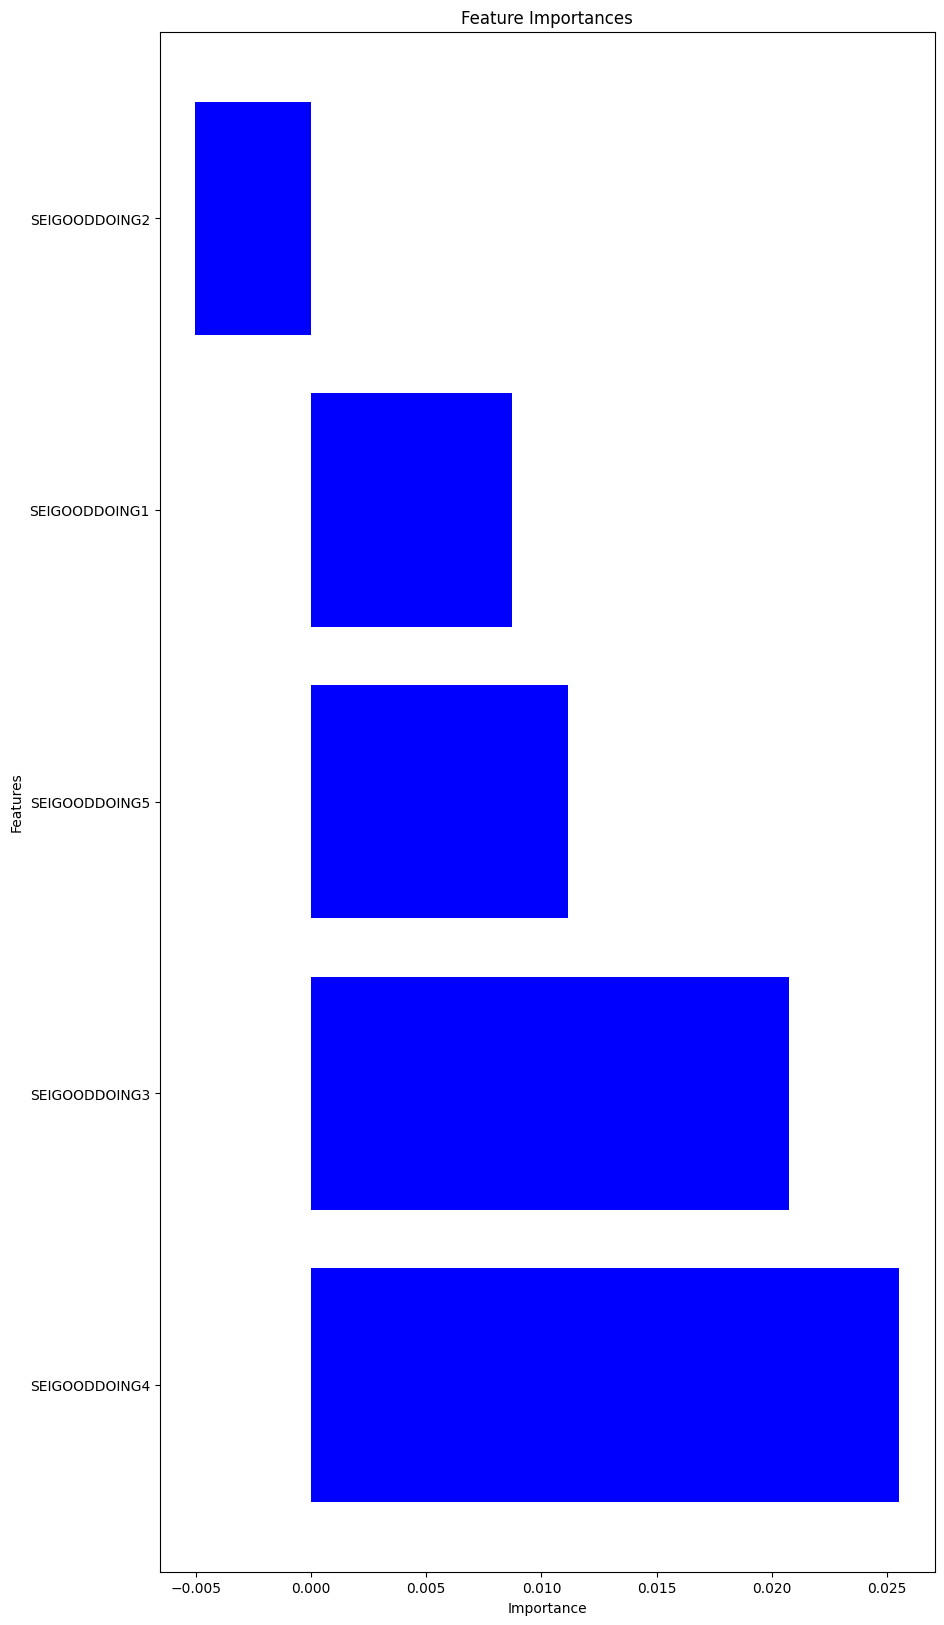

In [ ]:
calculateImportance(nb_sei, X_test, y_test)

In [ ]:
#calculateShapley(nb_sei, X_test, 0)

## Clasificación con RESI_ULT

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['labels'], axis=1).filter(regex='^RESI_')
y_train = df_train['labels']
X_test = df_test.drop(['labels'], axis=1).filter(regex='^RESI_')
y_test = df_test['labels']

In [ ]:
lr_pred = logistic_regresion(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 1}
Precisión de regresión logística con los mejores hiperparámetros: 0.853448275862069


In [ ]:
dt_pred = decision_tree(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 2, 'min_samples_split': 2}
Precisión del árbol de decisión con los mejores hiperparámetros: 0.853448275862069


In [ ]:
svm_pred = svm(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'C': 1, 'gamma': 1}
Precisión de SVM con los mejores hiperparámetros: 0.853448275862069


In [ ]:
nn_pred = neural_network(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
Precisión de redes neuronales con los mejores hiperparámetros: 0.8448275862068966


In [ ]:
knn_pred = k_neighbors(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Precisión de KNN: 0.853448275862069


In [ ]:
rf_pred = random_forest(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Precisión de Random Forest: 0.8706896551724138


In [ ]:
gb_pred = gradient_boosting(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Precisión de Random Forest: 0.8362068965517241


In [ ]:
nb_pred, nb_resi_ult = naive_bayes(X_train, y_train, X_test, y_test)

Precisión de Naive Bayes: 0.75


In [ ]:
results.loc['RESI_ULT'] = [roc_auc_score(y_test, lr_pred), calculateSpecificity(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred),
                           roc_auc_score(y_test, dt_pred), calculateSpecificity(y_test, dt_pred), recall_score(y_test, dt_pred), f1_score(y_test, dt_pred),
                           roc_auc_score(y_test, svm_pred), calculateSpecificity(y_test, svm_pred), recall_score(y_test, svm_pred), f1_score(y_test, svm_pred),
                           roc_auc_score(y_test, nn_pred), calculateSpecificity(y_test, nn_pred), recall_score(y_test, nn_pred), f1_score(y_test, nn_pred),
                           roc_auc_score(y_test, knn_pred), calculateSpecificity(y_test, knn_pred), recall_score(y_test, knn_pred), f1_score(y_test, knn_pred),
                           roc_auc_score(y_test, rf_pred), calculateSpecificity(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred),
                           roc_auc_score(y_test, gb_pred), calculateSpecificity(y_test, gb_pred), recall_score(y_test, gb_pred), f1_score(y_test, gb_pred),
                           roc_auc_score(y_test, nb_pred), calculateSpecificity(y_test, nb_pred), recall_score(y_test, nb_pred), f1_score(y_test, nb_pred)]

### Explainability

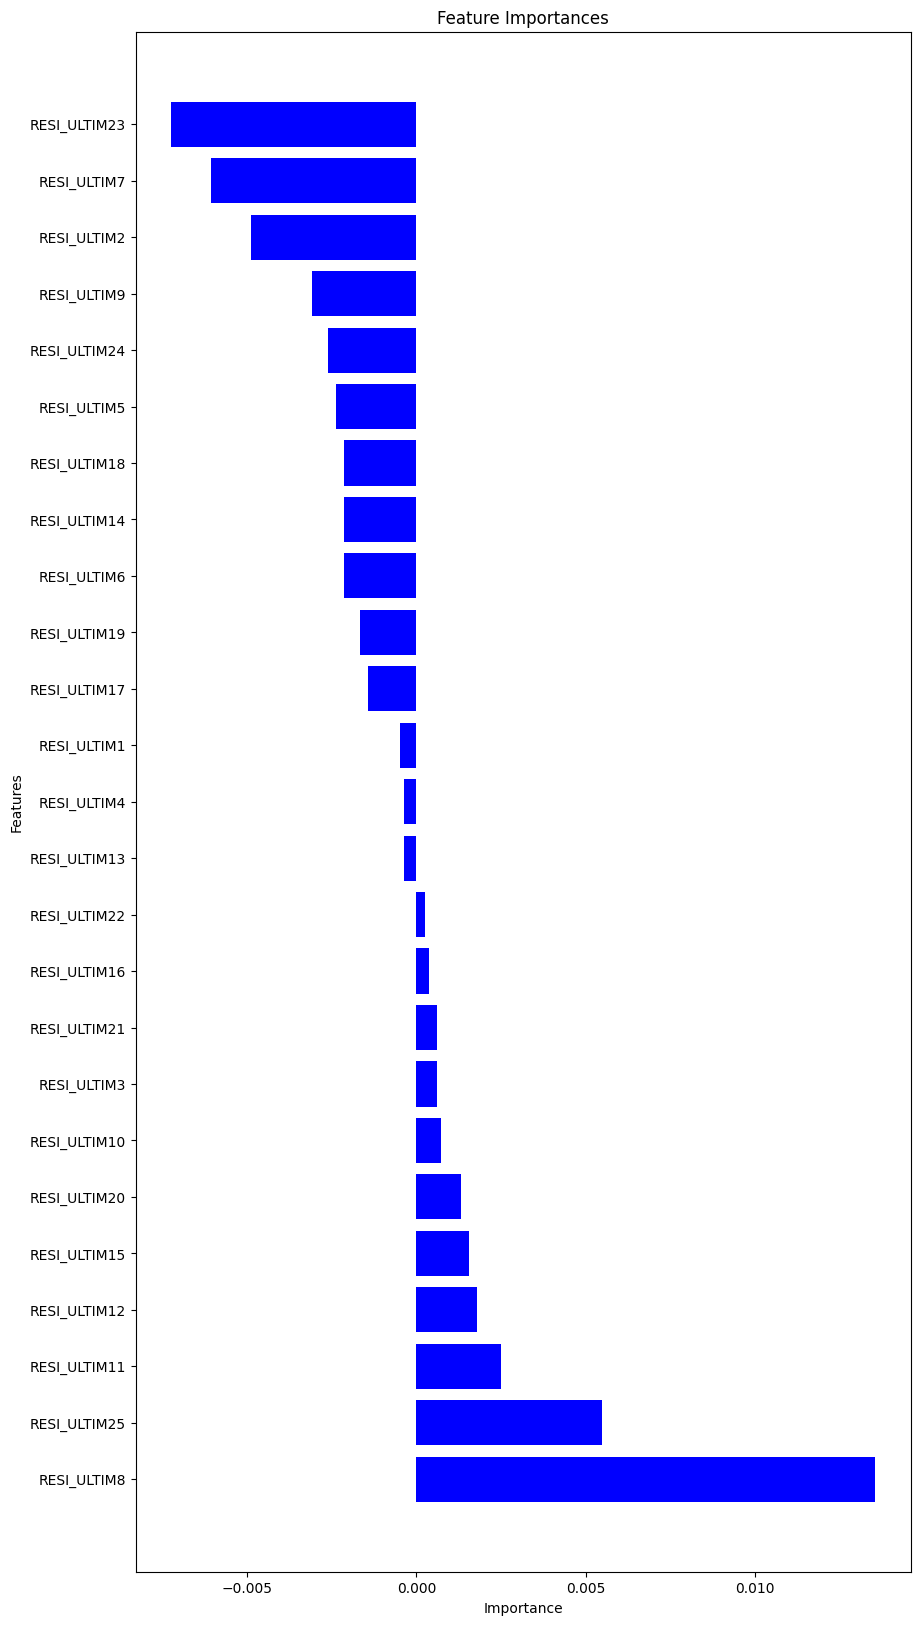

In [ ]:
calculateImportance(nb_resi_ult, X_test, y_test)

In [ ]:
#calculateShapley(nb_resi_ult, X_test, 0)

## Visualización y guardado

In [ ]:
results

,Regresión Logística,,,,Árbol de decisión,,,,SVM,,...,,,Gradient Boosting,,,,Naive Bayes,,,
Metrics,ROC AUC,Especificidad,Sensibilidad,F1-score,ROC AUC,Especificidad,Sensibilidad,F1-score,ROC AUC,Especificidad,...,Sensibilidad,F1-score,ROC AUC,Especificidad,Sensibilidad,F1-score,ROC AUC,Especificidad,Sensibilidad,F1-score
Completo,0.675579,0.939394,0.411765,0.466667,0.693999,0.858586,0.529412,0.45,0.5,1.0,...,0.470588,0.470588,0.670529,0.929293,0.411765,0.451613,0.795603,0.767677,0.823529,0.518519
Completo (EC),0.684789,0.89899,0.470588,0.457143,0.723411,0.858586,0.588235,0.487805,0.52347,0.929293,...,0.529412,0.5,0.728461,0.868687,0.588235,0.5,0.751931,0.79798,0.705882,0.489796
WHOQOL,0.69489,0.919192,0.470588,0.484848,0.615865,0.878788,0.352941,0.342857,0.719251,0.909091,...,0.470588,0.470588,0.656269,0.959596,0.352941,0.444444,0.731729,0.757576,0.705882,0.45283
HAD,0.700832,0.989899,0.411765,0.56,0.626857,0.959596,0.294118,0.384615,0.700832,0.989899,...,0.470588,0.533333,0.641117,0.929293,0.352941,0.4,0.771242,0.777778,0.764706,0.5
EAT,0.646168,0.939394,0.352941,0.413793,0.68984,0.909091,0.470588,0.470588,0.714201,0.89899,...,0.411765,0.424242,0.714201,0.89899,0.529412,0.5,0.731729,0.757576,0.705882,0.45283
RESI,0.607546,0.979798,0.235294,0.347826,0.636067,0.919192,0.352941,0.387097,0.616756,0.939394,...,0.411765,0.466667,0.768865,0.949495,0.588235,0.625,0.830065,0.777778,0.882353,0.555556
RED5,0.5,1.0,0.0,0.0,0.5,1.0,0.0,0.0,0.5,1.0,...,0.352941,0.48,0.612597,0.989899,0.235294,0.363636,0.631907,0.969697,0.294118,0.4
SEIGOODDOING,0.5,1.0,0.0,0.0,0.583185,0.989899,0.176471,0.285714,0.5,1.0,...,0.235294,0.347826,0.583185,0.989899,0.176471,0.285714,0.5,1.0,0.0,0.0
RESI_ULT,0.621806,0.949495,0.294118,0.37037,0.69489,0.919192,0.470588,0.484848,0.548723,0.979798,...,0.411765,0.482759,0.587344,0.939394,0.235294,0.296296,0.683007,0.777778,0.588235,0.408163


In [ ]:
results.to_excel('resultados/resultadosEAT.xlsx', index=True)
# v4 sin smote
# v5 smote en todo el dataset
# v6 smote solo en train
# v7 con RED5